<a href="https://colab.research.google.com/github/KevinCantrell/ScienceAndScienceFiction/blob/main/Reinforcement_learning_(Monty_Hall).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

# Step 1: Set up the game
print("Welcome to the Monty Hall Game!")

# You have 3 doors to choose from, one with a car behind it, and the other two with goats.
# The goal is to pick the door with the car.

# Step 2: Ask the user to make an initial choice
print("\nThere are three doors: 0, 1, and 2.")
user_choice = int(input("Please choose a door (0, 1, or 2): "))

# Randomly assign the car to one of the doors (0 = goat, 1 = car, 2 = goat)
doors = [0, 0, 0]  # 0 means goat, 1 means car
car_position = random.randint(0, 2)  # Randomly select the car's location
doors[car_position] = 1  # Place the car behind the randomly selected door

# Step 3: Monty opens a door
# Monty knows where the car is, and he will open a door that doesn't have the car behind it and is not the user's initial choice.
# So, we first find the possible doors that Monty can open (those that have goats behind them and are not the user's choice).
possible_doors = []
for i in range(3):  # Loop over the three doors (indices 0, 1, 2)
    if (i != user_choice) and (doors[i] == 0):  # Check if the door is not the user's choice and does not have a car
        possible_doors.append(i)  # Add the door index to the list

# Randomly choose one of those possible doors to reveal
monty_opens = random.choice(possible_doors)

# Step 4: Monty reveals the door with a goat behind it
print(f"\nMonty opens door {monty_opens}, which has a goat behind it.")

# Step 5: Offer the user the chance to switch
switch = input("Do you want to switch doors? (yes/no): ").strip().lower()

# If the user chooses to switch, their final choice will be the remaining unopened door
if (switch == "yes") or (switch == "y"):
    # The final choice will be the door that is not the user's initial choice or the door Monty opened
    final_choice = 3 - user_choice - monty_opens
else:
    # The user decides to stay with their initial choice
    final_choice = user_choice

# Step 6: Check if the user's final choice was correct
if doors[final_choice] == 1:
    print(f"\nCongratulations! You won the car by choosing door {final_choice}.")
else:
    print(f"\nSorry, you lost. The car was behind door {car_position}.")

# End of game
print("\nThanks for playing the Monty Hall Game!")


Welcome to the Monty Hall Game!

There are three doors: 0, 1, and 2.
Please choose a door (0, 1, or 2): 2

Monty opens door 1, which has a goat behind it.
Do you want to switch doors? (yes/no): y

Congratulations! You won the car by choosing door 0.

Thanks for playing the Monty Hall Game!


In [ ]:
import random

# Constants for the game
NUM_DOORS = 3  # Number of doors
NUM_GAMES = 10000  # Number of games to simulate

# Define the Monty Hall game logic
def monty_hall_game(initial_choice, switch_choice):
    # Step 1: Randomly place the car behind one of the doors
    doors = [0] * NUM_DOORS  # 0 = goat, 1 = car
    car_position = random.randint(0, NUM_DOORS - 1)
    doors[car_position] = 1  # Put the car behind a random door
    # Step 2: Monty opens a door (that doesn't have the car and isn't the initial choice)
    possible_doors = []
    for i in range(NUM_DOORS):
        if (i != initial_choice) and (doors[i] == 0):
            possible_doors.append(i)  # Only add doors that aren't the initial choice and have a goat
    monty_opens = random.choice(possible_doors)  # Monty opens a door with a goat
    # Step 3: If switch_choice is 1, the player switches their choice to the remaining door
    if switch_choice == 1:
        # Find the last remaining door that is neither the initial choice nor Monty's choice
        final_choice = None
        for i in range(NUM_DOORS):
            if (i != initial_choice) and (i != monty_opens):
                final_choice = i  # This must be the last remaining door
                break  # Exit the loop once we find the final door
    else:
        final_choice = initial_choice  # Stay with the initial choice
    # Step 4: Check if the final choice is the car (1 = win, 0 = loss)
    if doors[final_choice] == 1:
      reward = 1
    else:
      reward = -1 # Negative reward for choosing a goat
    return reward

# Function to simulate games and return win rate
def play_monty_hall_strategy(strategy, num_games=NUM_GAMES):
    wins = 0  # Track number of wins
    for _ in range(num_games):
        # Randomly choose an initial door
        initial_choice = random.randint(0, NUM_DOORS - 1)
        # Choose strategy
        if strategy == "switch":
            switch_choice = 1  # Always switch
        elif strategy == "stay":
            switch_choice = 0  # Always stay
        elif strategy == "random":
            switch_choice = random.randint(0, 1)  # Randomly choose to switch or stay
        # Play the game and get the result
        reward = monty_hall_game(initial_choice, switch_choice)
        if reward == 1:
            wins = wins+1  # Count wins
    # Calculate win rate
    win_rate = wins / num_games
    return win_rate

# Simulate games for different strategies
strategies = ["switch", "stay", "random"]
for strategy in strategies:
    win_rate = play_monty_hall_strategy(strategy)
    print(f"Strategy: {strategy.capitalize()} - Win Rate: {win_rate:.5f}")


Strategy: Switch - Win Rate: 0.66150
Strategy: Stay - Win Rate: 0.32390
Strategy: Random - Win Rate: 0.49680


Episode 0: Win Rate = 1.000
Episode 100: Win Rate = 0.426
Episode 200: Win Rate = 0.383
Episode 300: Win Rate = 0.385
Episode 400: Win Rate = 0.372
Episode 500: Win Rate = 0.377
Episode 600: Win Rate = 0.381
Episode 700: Win Rate = 0.382
Episode 800: Win Rate = 0.385
Episode 900: Win Rate = 0.378
Episode 1000: Win Rate = 0.383
Episode 1100: Win Rate = 0.385
Episode 1200: Win Rate = 0.387
Episode 1300: Win Rate = 0.382
Episode 1400: Win Rate = 0.390
Episode 1500: Win Rate = 0.382
Episode 1600: Win Rate = 0.384
Episode 1700: Win Rate = 0.382
Episode 1800: Win Rate = 0.383
Episode 1900: Win Rate = 0.379
Episode 2000: Win Rate = 0.374
Episode 2100: Win Rate = 0.372
Episode 2200: Win Rate = 0.369
Episode 2300: Win Rate = 0.368
Episode 2400: Win Rate = 0.368
Episode 2500: Win Rate = 0.365
Episode 2600: Win Rate = 0.363
Episode 2700: Win Rate = 0.362
Episode 2800: Win Rate = 0.363
Episode 2900: Win Rate = 0.361
Episode 3000: Win Rate = 0.361
Episode 3100: Win Rate = 0.361
Episode 3200: Win Ra

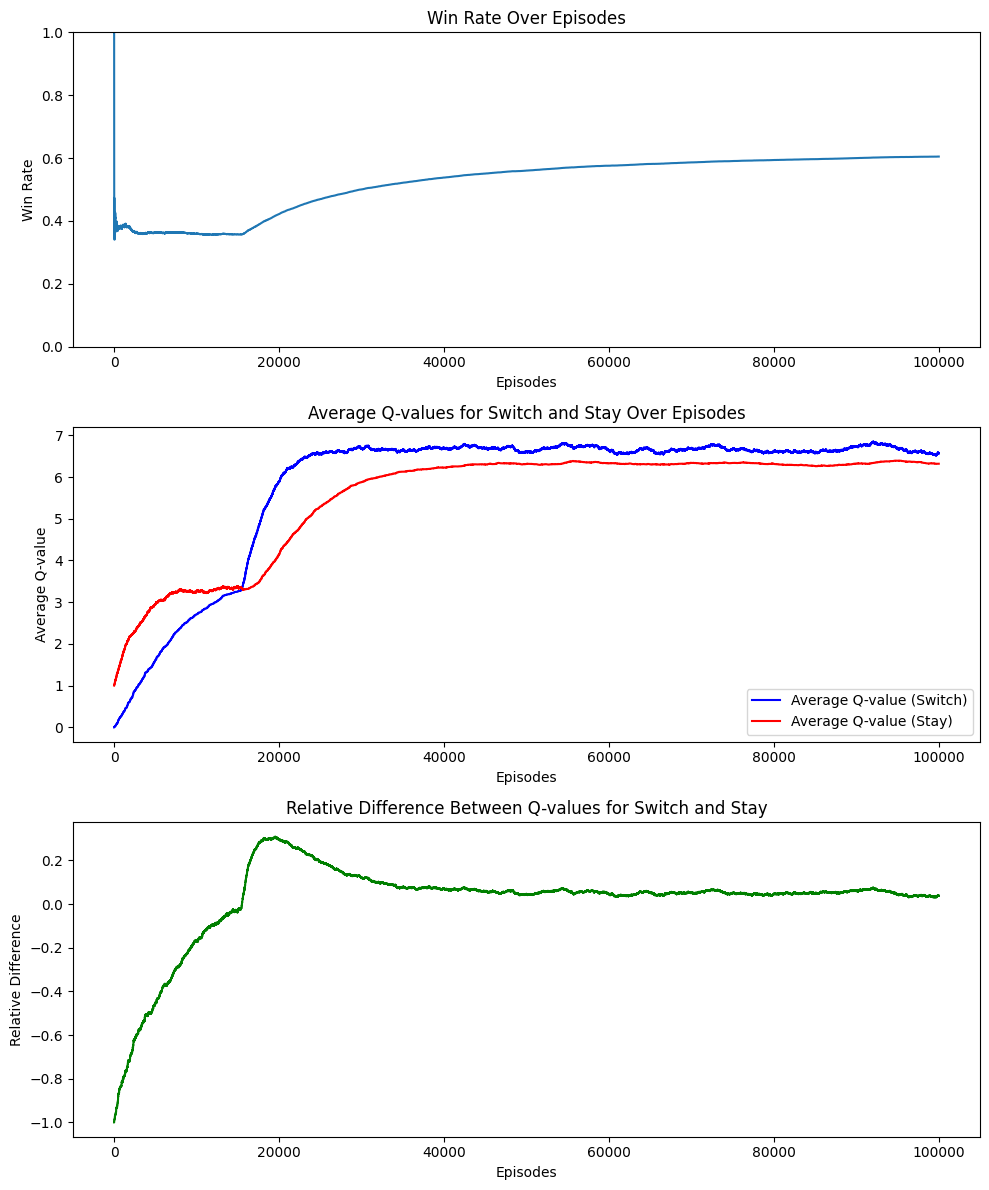


Final Q-table:
 Door 0: Stay = 6.35, Switch = 6.55
 Door 1: Stay = 6.31, Switch = 6.58
 Door 2: Stay = 6.30, Switch = 6.57

Final Average Win Rate: 0.605


In [ ]:
import random
import matplotlib.pyplot as plt

# Constants for the game
NUM_DOORS = 3  # Number of doors
NUM_EPISODES = 100000  # Number of episodes
alpha = 0.01  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate

# Initialize Q-table (Stay = 0, Switch = 1)
Q_table = [[1, 0] for _ in range(NUM_DOORS)]  # Q-values for Stay (0) and Switch (1) actions for each door

# Initialize variables for tracking win rate
num_wins = 0  # Counter for wins
win_rate_history = []  # List to store win rate for plotting
switch_q_history = []  # List to store average Q-value for switching
stay_q_history = []  # List to store average Q-value for staying
q_diff_history = []  # List to store relative difference between Q-values for switch and stay

# Define the Monty Hall game logic with negative reward for goat
def monty_hall_game(initial_choice, switch_choice):
    # Step 1: Randomly place the car behind one of the doors
    doors = [0] * NUM_DOORS  # 0 = goat, 1 = car
    car_position = random.randint(0, NUM_DOORS - 1)
    doors[car_position] = 1  # Put the car behind a random door
    # Step 2: Monty opens a door (that doesn't have the car and isn't the initial choice)
    possible_doors = []
    for i in range(NUM_DOORS):
        if (i != initial_choice) and (doors[i] == 0):
            possible_doors.append(i)  # Only add doors that aren't the initial choice and have a goat

    monty_opens = random.choice(possible_doors)  # Monty opens a door with a goat
    # Step 3: If switch_choice is 1, the player switches their choice to the remaining door
    if switch_choice == 1:
        # Find the last remaining door that is neither the initial choice nor Monty's choice
        final_choice = None
        for i in range(NUM_DOORS):
            if (i != initial_choice) and (i != monty_opens):
                final_choice = i  # This must be the last remaining door
                break  # Exit the loop once we find the final door
    else:
        final_choice = initial_choice  # Stay with the initial choice
    # Step 4: Check if the final choice is the car (1 = win, 0 = loss)
    reward = 1 if doors[final_choice] == 1 else 0
    return reward

# Q-learning algorithm
for episode in range(NUM_EPISODES):
    # Randomly select a door to start with
    initial_choice = random.randint(0, NUM_DOORS - 1)

    # Choose whether to switch or stay using epsilon-greedy approach
    if random.uniform(0, 1) < epsilon:
        # Exploration: Randomly choose to stay or switch
        switch_choice = random.randint(0, 1)
    else:
        # Exploitation: Choose action with higher Q-value for the initial door
        switch_choice = 1 if Q_table[initial_choice][1] > Q_table[initial_choice][0] else 0

    # Play the game and get the reward (1 = win, -1 = loss)
    reward = monty_hall_game(initial_choice, switch_choice)

    # Update the Q-table
    Q_table[initial_choice][switch_choice] += alpha * (reward + gamma * max(Q_table[initial_choice]) - Q_table[initial_choice][switch_choice])

    # Update win count if the agent wins (reward = 1)
    if reward == 1:
        num_wins = num_wins+1

    # Calculate and store the current win rate
    current_win_rate = num_wins / (episode + 1)
    win_rate_history.append(current_win_rate)

    # Calculate and store average Q-values for Stay and Switch actions
    avg_switch_q = sum([Q_table[door][1] for door in range(NUM_DOORS)]) / NUM_DOORS
    avg_stay_q = sum([Q_table[door][0] for door in range(NUM_DOORS)]) / NUM_DOORS
    switch_q_history.append(avg_switch_q)
    stay_q_history.append(avg_stay_q)

    # Calculate and store relative difference between Q-switch and Q-stay
    q_diff = (avg_switch_q - avg_stay_q) / max(abs(avg_switch_q), abs(avg_stay_q), 1e-6)  # Prevent division by zero or tiny values
    q_diff_history.append(q_diff)

    # Optionally, print progress every 100 episodes
    if episode % 100 == 0:
        print(f"Episode {episode}: Win Rate = {current_win_rate:.3f}")

# After loop, plot all results
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot Win Rate Over Episodes
axs[0].plot(win_rate_history)
axs[0].set_title("Win Rate Over Episodes")
axs[0].set_xlabel("Episodes")
axs[0].set_ylabel("Win Rate")
axs[0].set_ylim(0, 1)  # Fix y-axis scale to range [0, 1]

# Plot Average Q-values for Switch and Stay
axs[1].plot(switch_q_history, label="Average Q-value (Switch)", color='blue')
axs[1].plot(stay_q_history, label="Average Q-value (Stay)", color='red')
axs[1].set_title("Average Q-values for Switch and Stay Over Episodes")
axs[1].set_xlabel("Episodes")
axs[1].set_ylabel("Average Q-value")
axs[1].legend()

# Plot Relative Difference Between Q-values for Switch and Stay
axs[2].plot(q_diff_history, label="Relative Difference (Switch - Stay)", color='green')
axs[2].set_title("Relative Difference Between Q-values for Switch and Stay")
axs[2].set_xlabel("Episodes")
axs[2].set_ylabel("Relative Difference")

# Show all plots
plt.tight_layout()
plt.show()

# Final Q-table for reference
print("\nFinal Q-table:")
for door in range(NUM_DOORS):
    print(f" Door {door}: Stay = {Q_table[door][0]:.2f}, Switch = {Q_table[door][1]:.2f}")

# Print final average win rate
final_win_rate = num_wins / NUM_EPISODES
print(f"\nFinal Average Win Rate: {final_win_rate:.3f}")


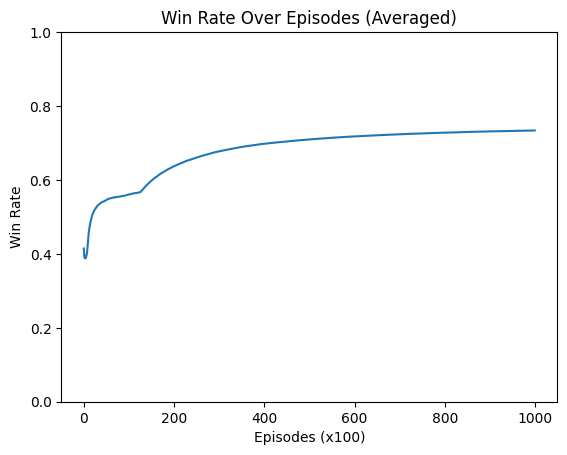

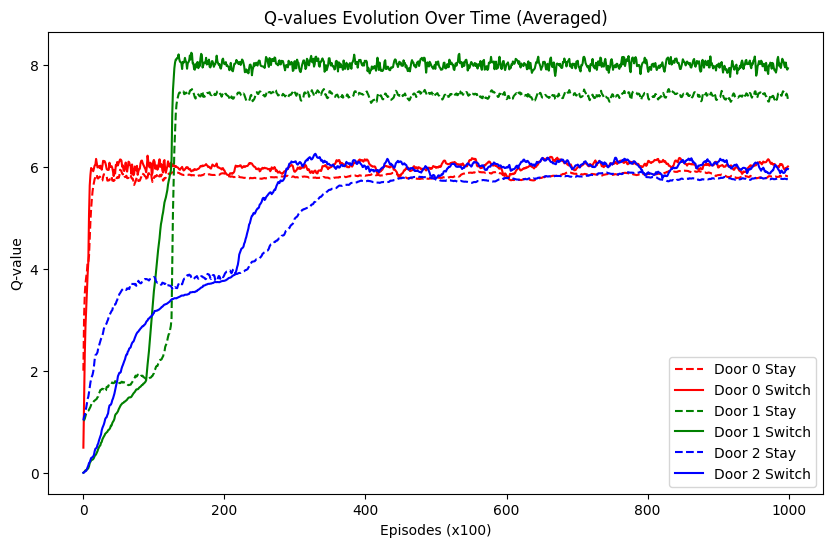


Final Q-table:
 Door 0: Stay = 5.81, Switch = 6.00
 Door 1: Stay = 7.31, Switch = 7.98
 Door 2: Stay = 5.75, Switch = 5.96

Final Average Win Rate: 0.734


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Constants for the game
NUM_DOORS = 3  # Number of doors
NUM_EPISODES = 1000000  # Number of episodes
alpha = 0.01  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
windowSize = 1000  # Window size for averaging

# Initialize Q-table (Q-values for each door and action [stay=0, switch=1])
Q_table = [[1, 0] for _ in range(NUM_DOORS)]  # Each door has Q-values for Stay (0) and Switch (1)

# Initialize tracking variables
num_wins = 0
win_rate_history = []

# Pre-allocate a 3D numpy array for tracking Q-values history:
# Shape will be (NUM_EPISODES, NUM_DOORS, 2) [2 for Stay (0) and Switch (1) actions]
q_values_history = np.zeros((NUM_EPISODES, NUM_DOORS, 2))

# Define the Monty Hall game logic
def monty_hall_game(initial_choice, switch_choice):
    """Simulates the Monty Hall problem and returns reward based on the outcome"""
    doors = [0, 0, 0]  # 0 = goat, 1 = car
    # Randomly assign the car's position with some bias
    car_position = random.choices([0, 1, 2], weights=[40/100, 20/100, 40/100])[0]
    doors[car_position] = 1  # Place the car behind one door

    # Monty opens a door with a goat (not the initial choice)
    possible_doors = []
    for i in range(NUM_DOORS):
        if i != initial_choice and doors[i] == 0:
            possible_doors.append(i)
    monty_opens = random.choice(possible_doors)

    # Switch choice logic
    if switch_choice == 1:
        final_choice = None
        for i in range(NUM_DOORS):
            if i != initial_choice and i != monty_opens:
                final_choice = i
                break
    else:
        final_choice = initial_choice

    # Reward (win = 1, loss = -1)
    reward = 1 if doors[final_choice] == 1 else 0
    return reward

# Q-learning process
for episode in range(NUM_EPISODES):
    # Choose initial door using epsilon-greedy strategy
    if random.uniform(0, 1) < epsilon:
        # Explore: Random door choice
        initial_choice = random.randint(0, NUM_DOORS - 1)
    else:
        # Exploit: Best learned door (maximize the Q-value)
        best_q_value = -float('inf')
        initial_choice = 0
        for door in range(NUM_DOORS):
            max_q_for_door = max(Q_table[door])
            if max_q_for_door > best_q_value:
                best_q_value = max_q_for_door
                initial_choice = door

    # Choose switch or stay using epsilon-greedy strategy
    if random.uniform(0, 1) < epsilon:
        # Explore: Random stay or switch
        switch_choice = random.randint(0, 1)
    else:
        # Exploit: Best action based on Q-values
        if Q_table[initial_choice][1] > Q_table[initial_choice][0]:
            switch_choice = 1
        else:
            switch_choice = 0

    # Play the game
    reward = monty_hall_game(initial_choice, switch_choice)

    # Update Q-table
    Q_table[initial_choice][switch_choice] += alpha * (reward + gamma * max(Q_table[initial_choice]) - Q_table[initial_choice][switch_choice])

    # Track win rate
    if reward == 1:
        num_wins += 1
    win_rate_history.append(num_wins / (episode + 1))

    # Store Q-values history at this episode (for tracking)
    q_values_history[episode] = np.array(Q_table)

# Apply windowing (averaging every window_size episodes)
def average_over_window(data, window_size):
    """Averages over a sliding window of size `window_size`"""
    return np.array([np.mean(data[i:i + window_size], axis=0) for i in range(0, len(data), window_size)])

# Average win rate
win_rate_history_avg = average_over_window(win_rate_history, windowSize)

# Average Q-values history (for all doors and actions)
q_values_history_avg = np.zeros((len(win_rate_history_avg), NUM_DOORS, 2))

for door in range(NUM_DOORS):
    for action in range(2):  # Stay (0) and Switch (1)
        q_values_history_avg[:, door, action] = average_over_window(q_values_history[:, door, action], windowSize)

# Plot win rate over episodes (after averaging)
plt.plot(win_rate_history_avg)
plt.title("Win Rate Over Episodes (Averaged)")
plt.xlabel("Episodes (x100)")
plt.ylabel("Win Rate")
plt.ylim(0, 1)
plt.show()

# Plot Q-values evolution over time (separate lines for each door and action)
plt.figure(figsize=(10, 6))

# Define a color palette for the doors (use the same color for each door)
colors = ['r', 'g', 'b']  # Assign different colors for each door (red, green, blue)

# For each door, plot the evolution of the Q-values for "stay" and "switch"
for door in range(NUM_DOORS):
    # Plot the "stay" Q-values for this door (dashed line)
    plt.plot(q_values_history_avg[:, door, 0], label=f"Door {door} Stay", linestyle='--', color=colors[door])
    # Plot the "switch" Q-values for this door (solid line)
    plt.plot(q_values_history_avg[:, door, 1], label=f"Door {door} Switch", linestyle='-', color=colors[door])

# Add labels and title to the plot
plt.title("Q-values Evolution Over Time (Averaged)")
plt.xlabel("Episodes (x100)")
plt.ylabel("Q-value")
plt.legend()
plt.show()

# Print final Q-table
print("\nFinal Q-table:")
for door in range(NUM_DOORS):
    print(f" Door {door}: Stay = {Q_table[door][0]:.2f}, Switch = {Q_table[door][1]:.2f}")

# Print final win rate
final_win_rate = num_wins / NUM_EPISODES
print(f"\nFinal Average Win Rate: {final_win_rate:.3f}")
